In [37]:
## Para Region, Ciudad, Estado y Pais (JUAN)
##  * Gráficos básicos que nos muestren los más representativos.
##  * Un análisis complementario según nivel demográfico/nivel adquisitivo con datos externos.

## Para Jerarquización (JUAN)
##  * Jerarquización según algún campo como para obtener un análisis más enriquecido.
##  * Tratar de pensar plot de relación entre por ejemplo resolución de pantalla (o bien algo que identifique el dispositivo ) y el valor.

## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

# -*- coding: utf-8 -*-
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', 50)


In [52]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
eventos = pd.read_csv('events.csv', encoding = 'utf-8')

In [54]:
eventos.info()

In [40]:
## PAISES CON MAS CANTIDAD DE VISITAS
eventos['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Romania                   7
Italy                     7
Guadeloupe                6
Russia                    6
Dominican Republic        6
Germany                   5
Paraguay                  4
Colombia                  4
Bangladesh                4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Uruguay                   1
Cape Verde                1
South Africa              1
Ireland                   1
Belize                    1
Uzbekistan                1
Israel                    1
Saudi Arabia              1
Mexico                    1
China               

In [55]:
eventos['pais_grafico_visitas'] = eventos['country']
eventos.loc[eventos['pais_grafico_visitas'].str.contains(r'United.States', na=False), 'pais_grafico_visitas'] = 'USA'
eventos.loc[eventos['pais_grafico_visitas'].str.contains(r'\b(?!Brazil|USA|Argentina|Canada|Unknown)\b\S+', na=False), 'pais_grafico_visitas'] = 'Otros'
eventos.loc[eventos['pais_grafico_visitas'].str.contains(r'USA', na=False), 'pais_grafico_visitas'] = 'Estados Unidos'

isNotUnknown = eventos['pais_grafico_visitas'] != 'Unknown'

Text(0,0.5,u'Pa\xeds')

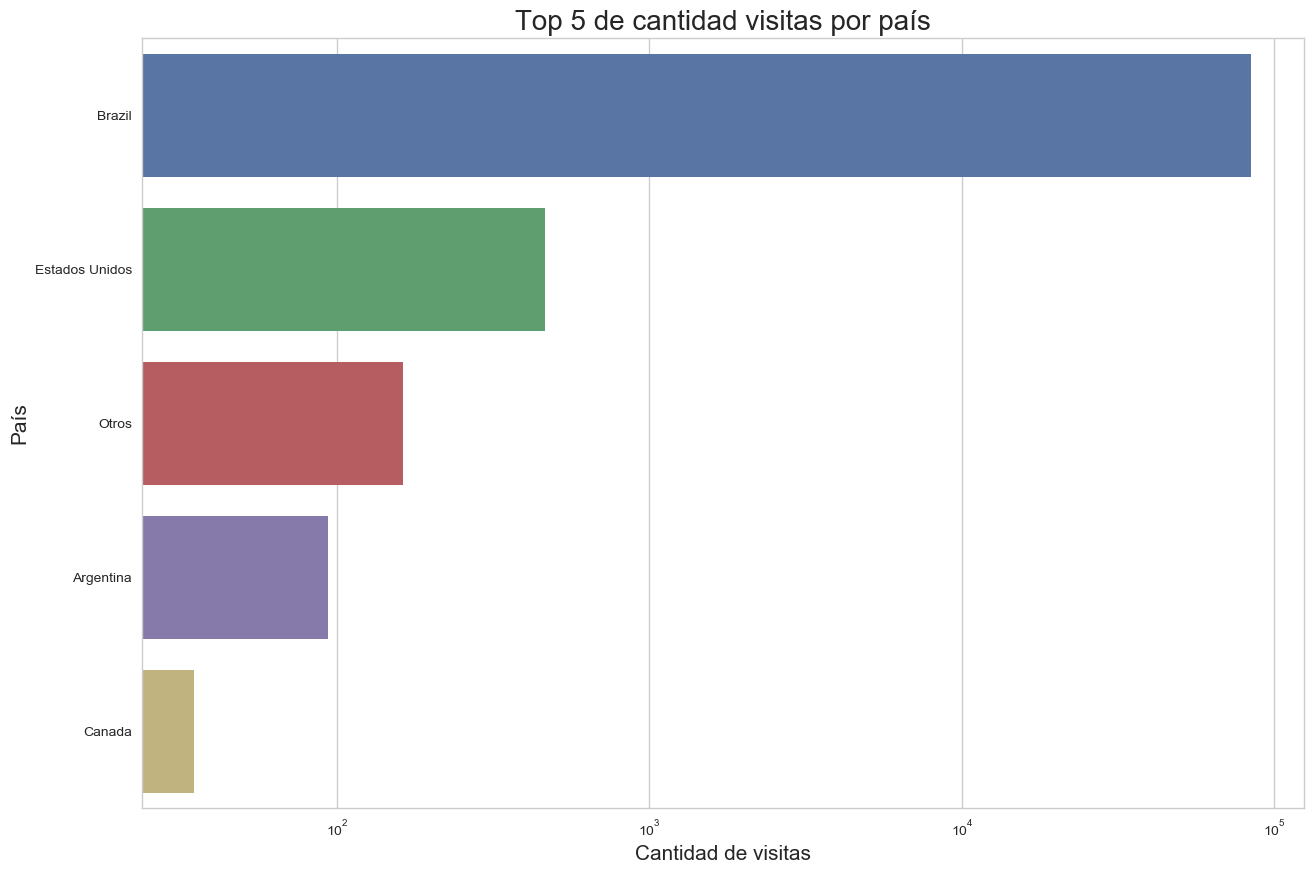

In [56]:
pais_grafico_data = eventos[isNotUnknown]['pais_grafico_visitas'].value_counts()
g = sns.barplot(x=pais_grafico_data.values, y=pais_grafico_data.index, orient='h')
g.set_xscale('log')
g.set_title(u"Top 5 de cantidad visitas por país", fontsize=20)
g.set_xlabel(u"Cantidad de visitas", fontsize=15)
g.set_ylabel(u"País", fontsize=15)

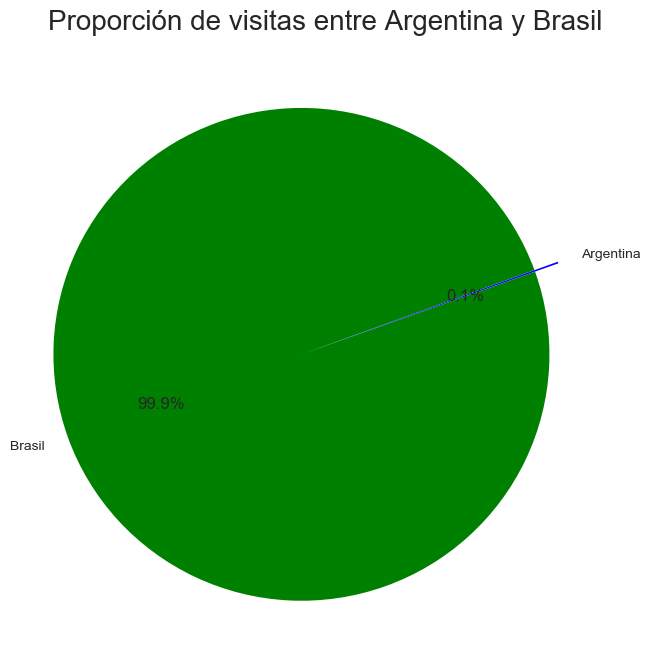

In [57]:
isBrazil = eventos['country'] == 'Brazil'
isArgentina = eventos['country'] == 'Argentina'

sizes = [eventos[isBrazil]['country'].count(), eventos[isArgentina]['country'].count()]
nombres = [u'Brasil', u'Argentina']
plt.figure(figsize=(8, 8))
plt.title(u'Proporción de visitas entre Argentina y Brasil', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['Green', 'Blue'], explode=(0.1, 0))
plt.show()

## no sirve este pie chart, vamos a tener que ir por uno de barras con escala log, ver abajo!!

Brazil       84308
Argentina       94
Name: country, dtype: int64

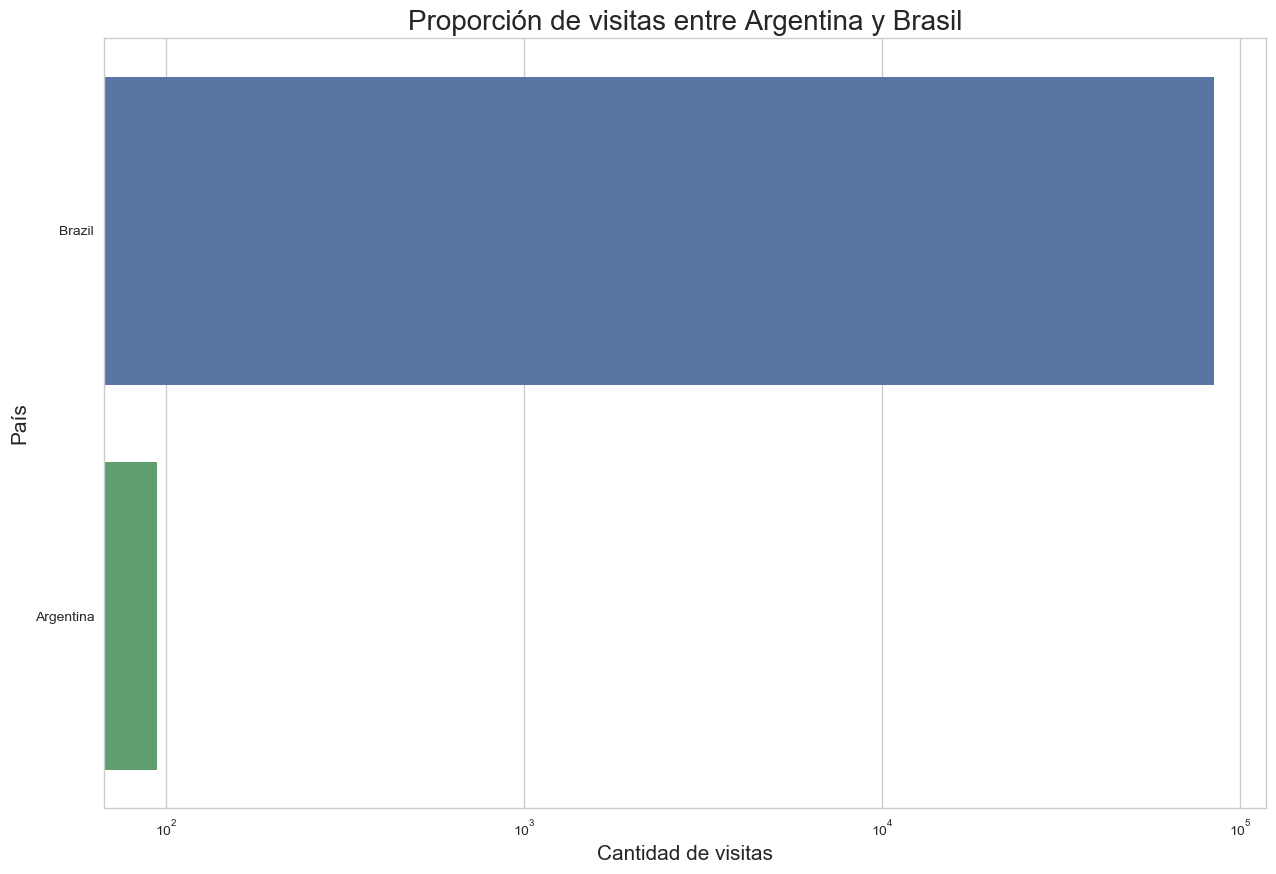

In [70]:
visitas_argentina_vs_brasil_grafico_data = eventos[isBrazil | isArgentina]['country'].value_counts()

g = sns.barplot(x=visitas_argentina_vs_brasil_grafico_data.values, y=visitas_argentina_vs_brasil_grafico_data.index, orient='h')
g.set_xscale('log')
g.set_title(u"Proporción de visitas entre Argentina y Brasil", fontsize=20)
g.set_xlabel(u"Cantidad de visitas", fontsize=15)
g.set_ylabel(u"País", fontsize=15)

eventos[isBrazil | isArgentina]['country'].value_counts()

Text(0,0.5,u'Region')

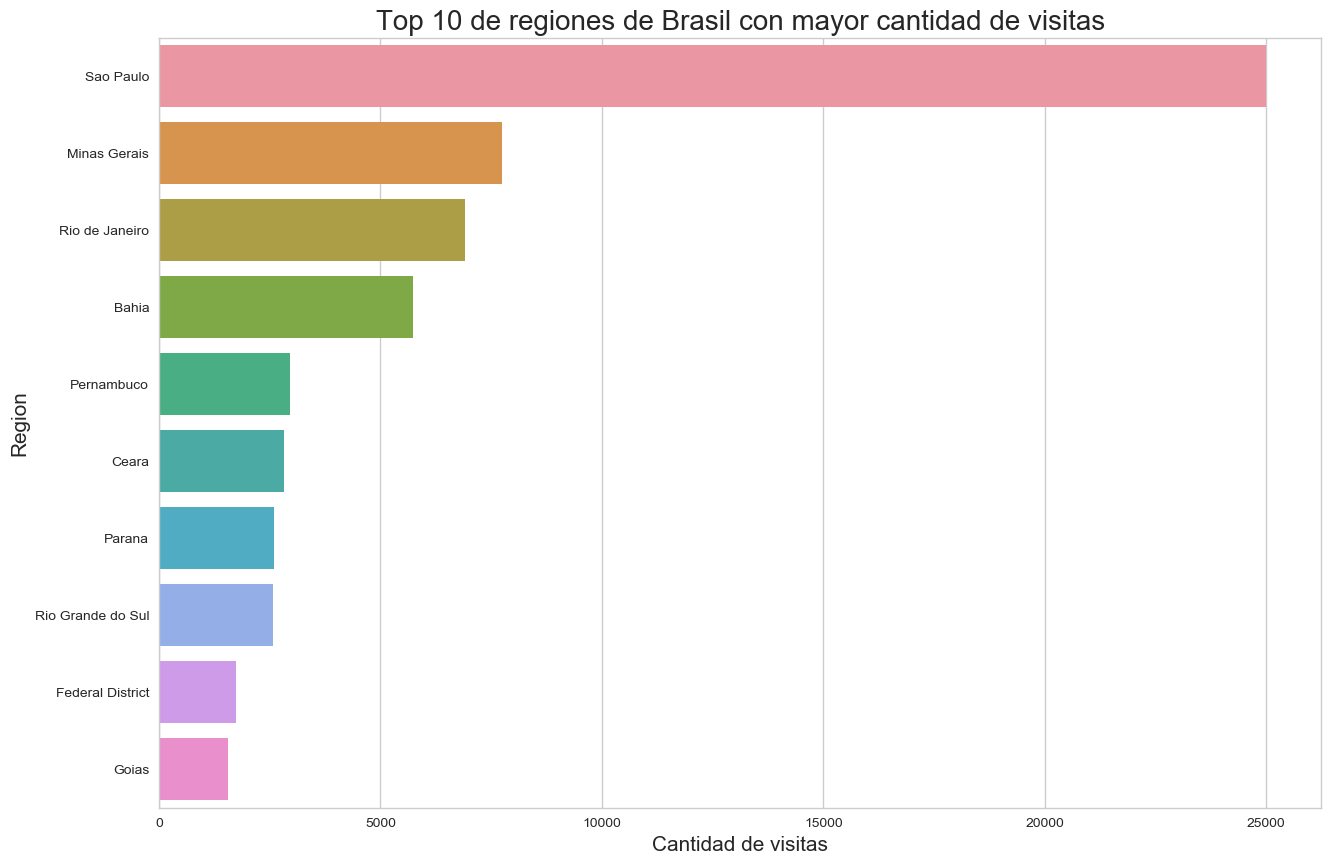

In [60]:
eventos['region_grafico_visitas'] = eventos['region']
isNotUnknownRegion = eventos['region_grafico_visitas'] != 'Unknown'
region_brasil_grafico_data = eventos[isBrazil & isNotUnknownRegion]['region_grafico_visitas'].value_counts()[:10]
g = sns.barplot(x=region_brasil_grafico_data.values, y=region_brasil_grafico_data.index, orient='h')
g.set_title(u"Top 10 de regiones de Brasil con mayor cantidad de visitas", fontsize=20)
g.set_xlabel(u"Cantidad de visitas", fontsize=15)
g.set_ylabel(u"Region", fontsize=15)

Text(0,0.5,u'Region')

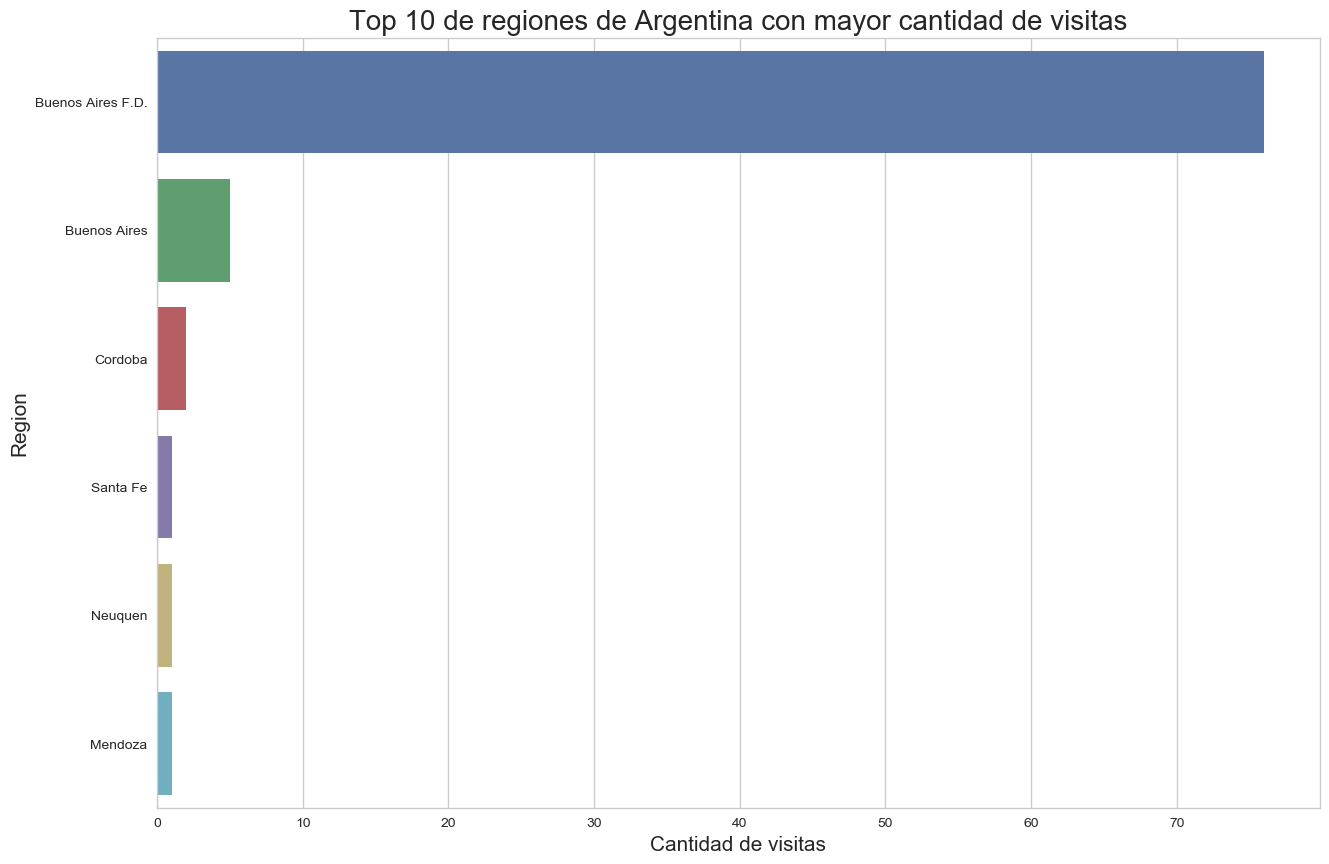

In [61]:
region_argentina_grafico_data = eventos[isArgentina & isNotUnknownRegion]['region_grafico_visitas'].value_counts()[:10]
g = sns.barplot(x=region_argentina_grafico_data.values, y=region_argentina_grafico_data.index, orient='h')
g.set_title(u"Top 10 de regiones de Argentina con mayor cantidad de visitas", fontsize=20)
g.set_xlabel(u"Cantidad de visitas", fontsize=15)
g.set_ylabel(u"Region", fontsize=15)

Text(0,0.5,u'Ciudad')

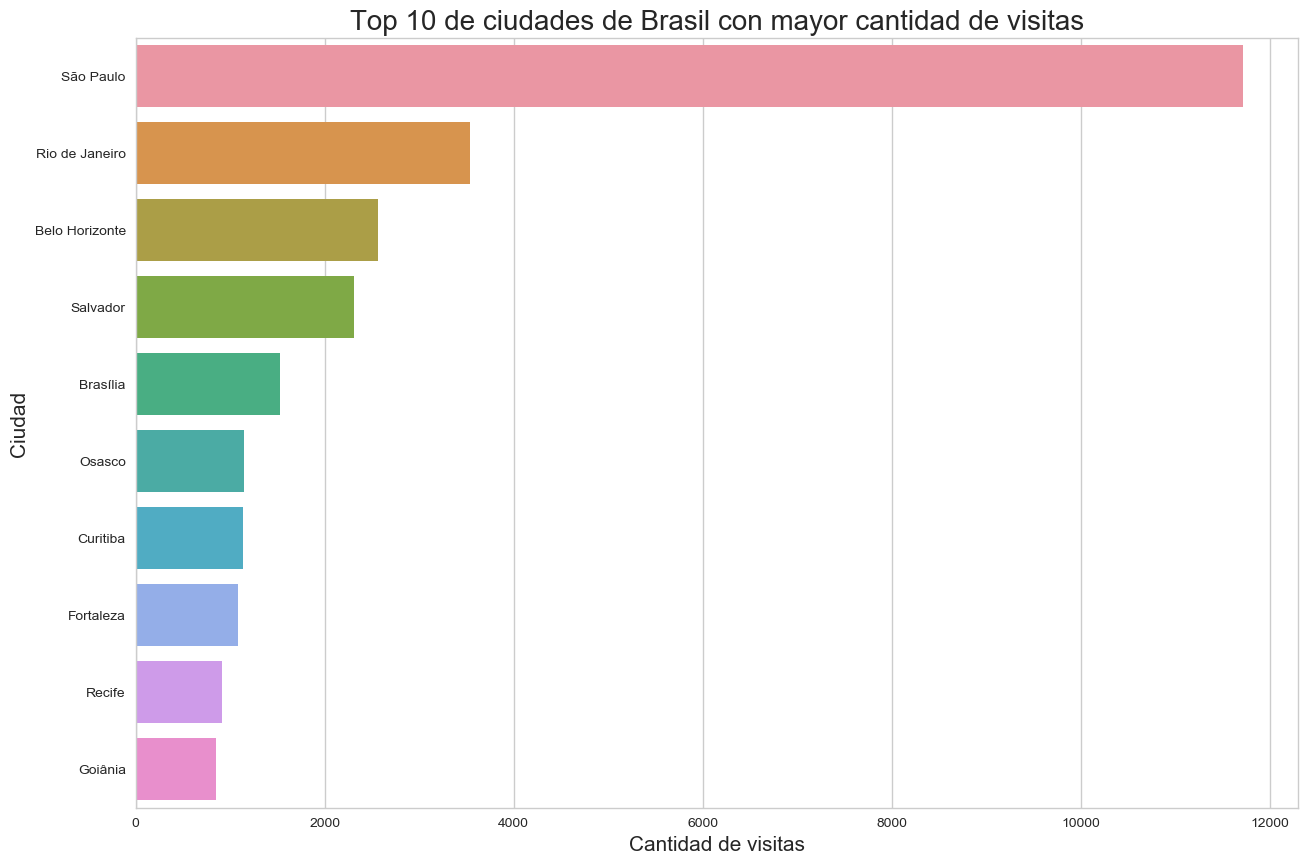

In [62]:
eventos['ciudad_grafico_visitas'] = eventos['city']
isNotUnknownCity = eventos['ciudad_grafico_visitas'] != 'Unknown'
ciudad_brasil_grafico_data = eventos[isBrazil & isNotUnknownCity]['ciudad_grafico_visitas'].value_counts()[:10]
g = sns.barplot(x=ciudad_brasil_grafico_data.values, y=ciudad_brasil_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Brasil con mayor cantidad de visitas", fontsize=20)
g.set_xlabel(u"Cantidad de visitas", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0,0.5,u'Ciudad')

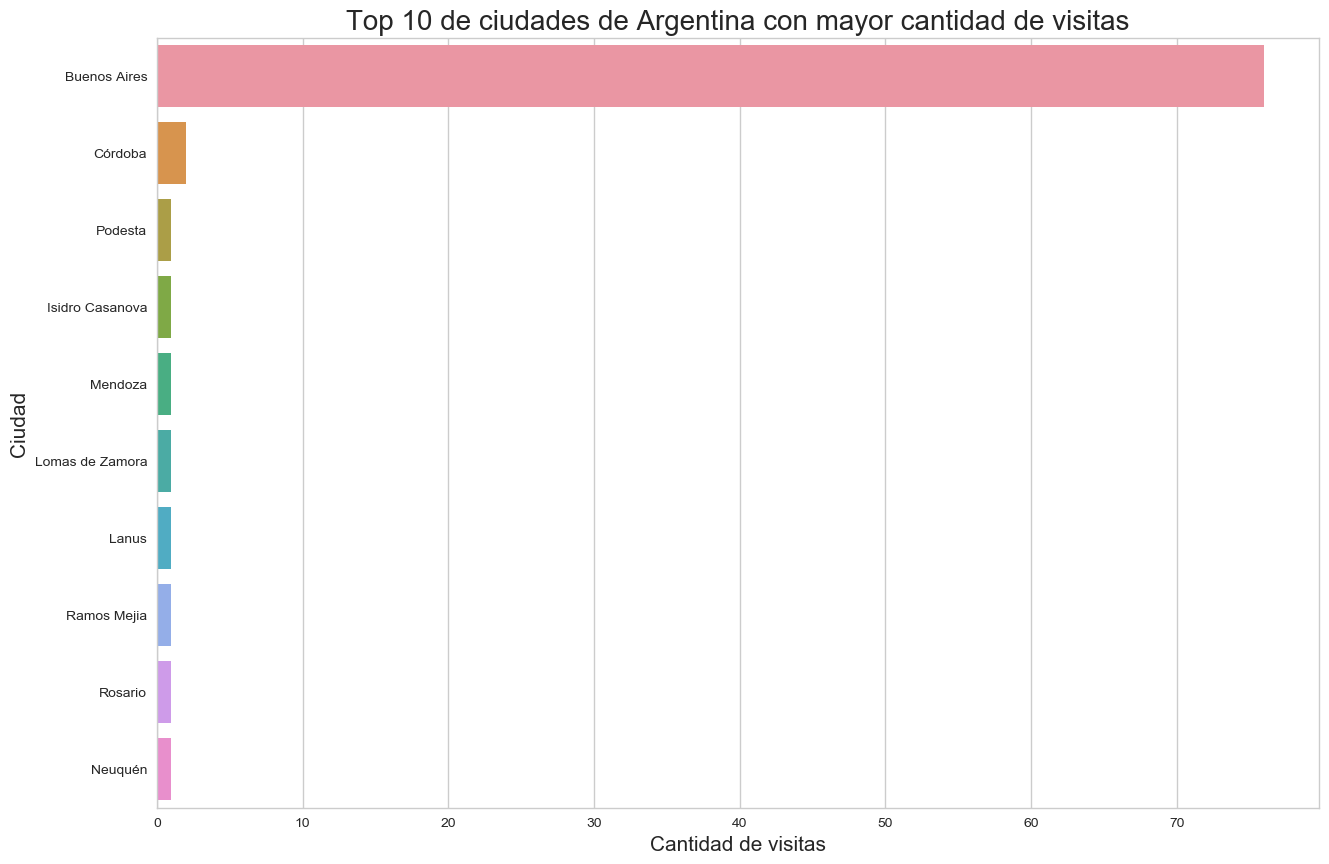

In [63]:
eventos['ciudad_grafico_visitas'] = eventos['city']
isNotUnknownCity = eventos['ciudad_grafico_visitas'] != 'Unknown'
ciudad_argentina_grafico_data = eventos[isArgentina & isNotUnknownCity]['ciudad_grafico_visitas'].value_counts()[:10]
g = sns.barplot(x=ciudad_argentina_grafico_data.values, y=ciudad_argentina_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Argentina con mayor cantidad de visitas", fontsize=20)
g.set_xlabel(u"Cantidad de visitas", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

In [64]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,pais_grafico_visitas,region_grafico_visitas,ciudad_grafico_visitas
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,Brazil,Pernambuco,Camaragibe
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,Brazil,Rio de Janeiro,Rio de Janeiro
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,Brazil,Rio de Janeiro,Rio de Janeiro


In [66]:
eventos.loc[eventos['event'] == 'visited site']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,pais_grafico_visitas,region_grafico_visitas,ciudad_grafico_visitas
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,Brazil,Pernambuco,Camaragibe
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,Brazil,Rio de Janeiro,Rio de Janeiro
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,Brazil,Rio de Janeiro,Rio de Janeiro
16,2018-05-24 11:21:07,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0,Brazil,Rio de Janeiro,Rio de Janeiro
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,Brazil,Sao Paulo,Ribeirão Preto
87,2018-05-04 18:47:03,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,Returning,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 66.0,Brazil,Sao Paulo,Ribeirão Preto
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,Brazil,Unknown,Unknown
106,2018-06-06 18:40:53,visited site,001bb7eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52,Brazil,Unknown,Unknown
108,2018-06-08 12:15:33,visited site,001bb7eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,Returning,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52,Brazil,Unknown,Unknown
112,2018-05-29 12:56:08,visited site,001f1653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x570,Android 6,Chrome Mobile 39,Brazil,Unknown,Unknown
